<a href="https://colab.research.google.com/github/KevKibe/Determining-Target-Market-For-a-VideoGame-Company-using-ML/blob/main/video_games_sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q kaggle --quiet

In [4]:
!cp kaggle.json ~/.kaggle/

In [14]:
!kaggle datasets download -d gregorut/videogamesales

  0% 0.00/381k [00:00<?, ?B/s]
100% 381k/381k [00:00<00:00, 125MB/s]


In [15]:
!unzip videogamesales.zip

Archive:  videogamesales.zip
  inflating: vgsales.csv             


In [127]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


In [273]:
games_data = pd.read_csv('/content/vgsales.csv')
games_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [56]:
games_data.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


# Data Cleaning

In [74]:
games_data.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [274]:
#dropping rows with null values
games_data.dropna(inplace=True)

In [77]:
games_data.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [84]:
games_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16291 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16291 non-null  int64  
 1   Year          16291 non-null  float64
 2   Genre         16291 non-null  object 
 3   Publisher     16291 non-null  object 
 4   NA_Sales      16291 non-null  float64
 5   EU_Sales      16291 non-null  float64
 6   JP_Sales      16291 non-null  float64
 7   Other_Sales   16291 non-null  float64
 8   Global_Sales  16291 non-null  float64
dtypes: float64(6), int64(1), object(2)
memory usage: 1.2+ MB


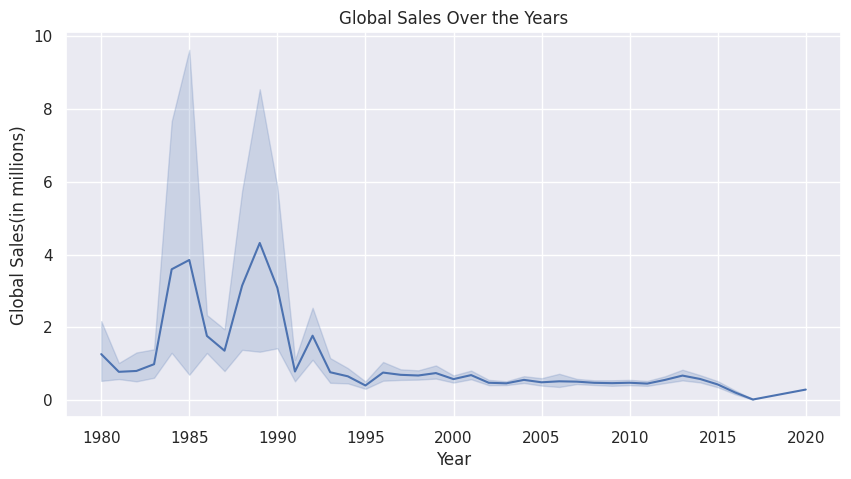

In [276]:
sns.set(style="darkgrid")  
plt.figure(figsize=(10, 5))  
sns.lineplot(data=games_data, x='Year', y='Global_Sales')

plt.xlabel('Year')
plt.ylabel('Global Sales(in millions)')
plt.title('Global Sales Over the Years')

plt.show()


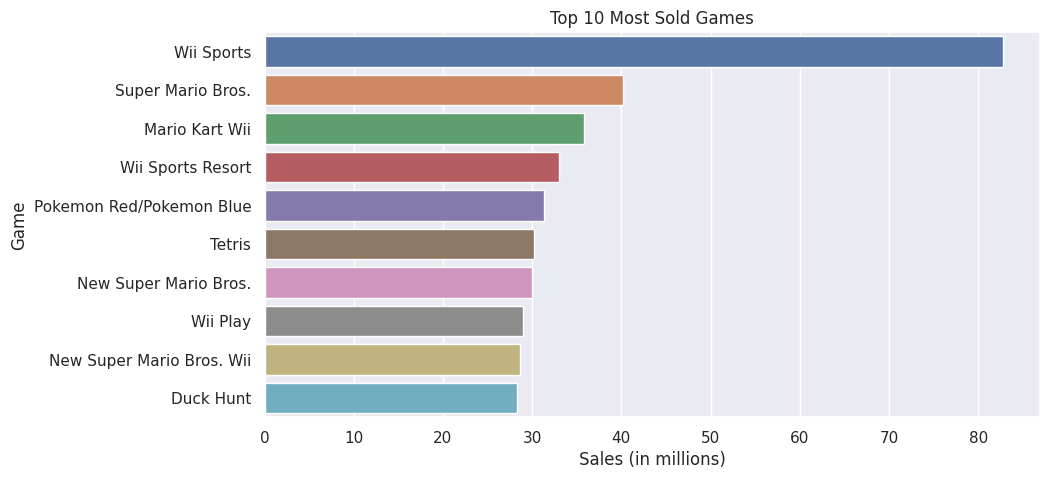

In [54]:
sns.set(style="darkgrid")  

plt.figure(figsize=(10, 5))  

top_10_games = games_data.sort_values(by='Global_Sales', ascending=False).head(10)

sns.barplot(data=top_10_games, x='Global_Sales', y='Name')

plt.xlabel('Sales (in millions)')
plt.ylabel('Game')
plt.title('Top 10 Most Sold Games')

plt.show()


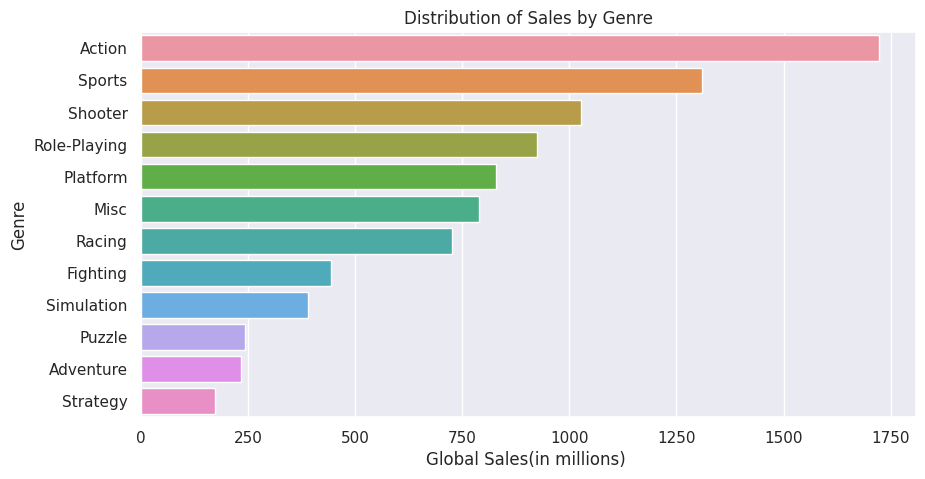

In [277]:
sales_by_genre = games_data.groupby('Genre')['Global_Sales'].sum().reset_index()
sales_by_genre = sales_by_genre.sort_values(by='Global_Sales', ascending=False)
sns.set(style="darkgrid")
plt.figure(figsize=(10, 5))
sns.barplot(data=sales_by_genre, x='Global_Sales', y='Genre')

plt.xlabel('Global Sales(in millions) ')
plt.ylabel('Genre')
plt.title('Distribution of Sales by Genre')
plt.show()


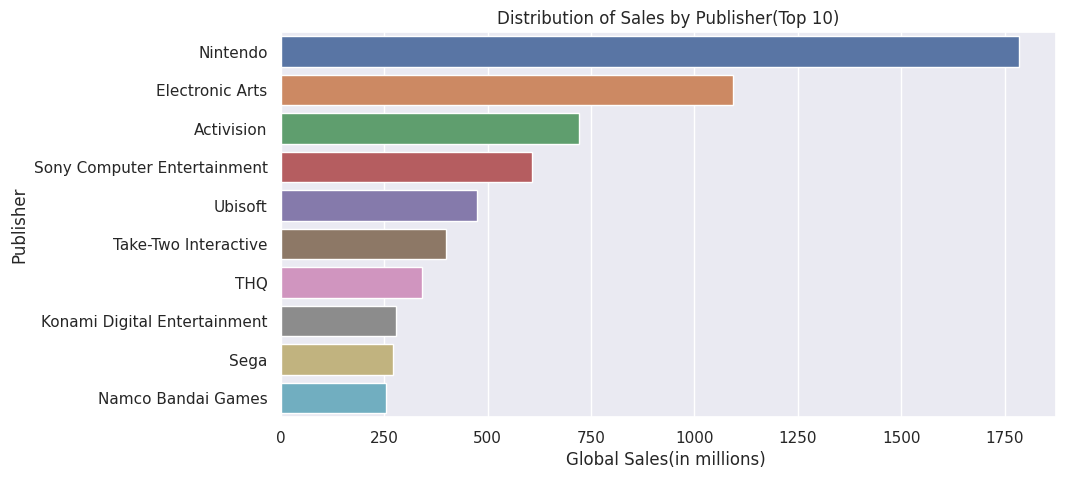

In [278]:

sales_by_publisher = games_data.groupby('Publisher')['Global_Sales'].sum().reset_index()
sales_by_publisher = sales_by_publisher.sort_values(by='Global_Sales', ascending=False).head(10)
sns.set(style="darkgrid")
plt.figure(figsize=(10, 5))
sns.barplot(data=sales_by_publisher, x='Global_Sales', y='Publisher')

plt.xlabel('Global Sales(in millions) ')
plt.ylabel('Publisher')
plt.title('Distribution of Sales by Publisher(Top 10)')
plt.show()


In [186]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor

In [265]:
games_df = games_data.drop(['Platform','Name','Rank','Genre','Publisher','Year'], axis=1)


In [266]:
scaler = MinMaxScaler()
cols=['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']
games_df[cols] = scaler.fit_transform(games_df[cols])
games_df.head()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1.000000,1.000000,0.368885,0.800378,1.000000
1,0.700892,0.123363,0.666341,0.072848,0.486281
2,0.382020,0.443832,0.370841,0.313150,0.432854
3,0.379610,0.379394,0.320939,0.280038,0.398767
4,0.271632,0.306340,1.000000,0.094607,0.379064


In [254]:
games_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16291 entries, 0 to 16597
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   NA_Sales      16291 non-null  float64
 1   EU_Sales      16291 non-null  float64
 2   JP_Sales      16291 non-null  float64
 3   Other_Sales   16291 non-null  float64
 4   Global_Sales  16291 non-null  float64
dtypes: float64(5)
memory usage: 763.6 KB


In [267]:
X = games_df.drop('Global_Sales', axis=1)
y = games_df['Global_Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


In [268]:
linreg = LinearRegression(fit_intercept=True,positive=False)
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2) Score:", r2)

Mean Squared Error (MSE): 2.6105663201718523e-09
Mean Absolute Error (MAE): 2.2708716072131532e-05
R-squared (R2) Score: 0.866028723607562


In [214]:
rig = Ridge(alpha=0.00001)
rig.fit(X_train, y_train)
y_pred = rig.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2) Score:", r2)

Mean Squared Error (MSE): 2.615069815142547e-09
Mean Absolute Error (MAE): 2.247791451607858e-05
R-squared (R2) Score: 0.8657976093988218


In [218]:
from sklearn.linear_model import Lasso
lass = Lasso(alpha=0.000001)  
lass.fit(X_train, y_train)
y_pred = lass.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2) Score:", r2)

Mean Squared Error (MSE): 2.5194418070295656e-09
Mean Absolute Error (MAE): 3.656601149179378e-05
R-squared (R2) Score: 0.8707051293521624


In [239]:
from sklearn.model_selection import GridSearchCV
linreg = LinearRegression()
param_grid = {
    
    'fit_intercept': [True, False],
    #'normalize': [True, False]
    'positive': [True, False]

}

grid_search = GridSearchCV(estimator=linreg, param_grid=param_grid, cv=20)

grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

y_pred = grid_search.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Best Hyperparameters:", best_params)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2) Score:", r2)

Best Hyperparameters: {'fit_intercept': True, 'positive': False}
Mean Squared Error (MSE): 2.6151749329892736e-09
Mean Absolute Error (MAE): 2.247517380767114e-05
R-squared (R2) Score: 0.8657922148712096


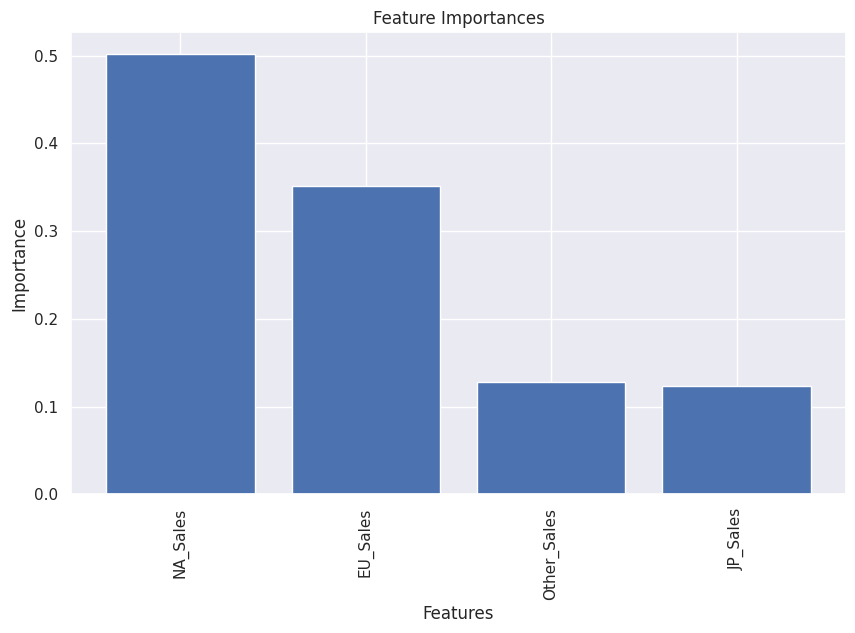

In [269]:
import matplotlib.pyplot as plt

importances = np.abs(linreg.coef_)
# Get the feature names
feature_names = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']

indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(importances)), importances[indices])
plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation='vertical')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.show()

In the gaming Industry North America has the most influence in terms of sales.